In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sympy as sym
import math

# Método de Newton-Raphson 

$$ f(x) = 3x^{5}+5x^{4}-x^{3} $$

In [2]:
def Function(x):
    #return 3*x**5 + 5*x**4 - x**3
    #return (2*x**4 - 2*x**3 + x**2 + 3*x - 4)
    #return (x**3 - 4*x**2 + 2)
    
    #return (3*x**2-1)/2.
    #return (5*x**3 - 3.*x)/2. 
    #return (35.*x**4 - 30.*x**2 + 3.)/8. 
    return (63*x**5 - 70*x**3 + 15*x)/8

In [3]:
def Derivative(f,x,h):
    d = 0.
    
    if(h != 0):
        d = (f(x+h)-f(x-h))/(2.*h)
        
    return d

In [4]:
xi, xf, Npoints = -1.,1.,1000
h = (xf-xi)/float(Npoints)

(-1, 1)

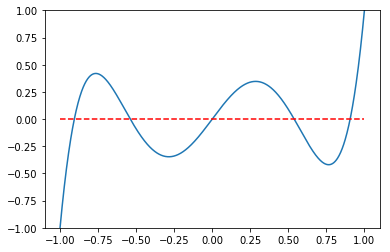

In [5]:
X = np.linspace(xi,xf,Npoints)
Y = Function(X)
Y1 = np.zeros(len(X))

plt.plot(X,Y)
plt.plot(X,Y1,'r--')
#plt.xlim(-1,4)
plt.ylim(-1,1)
#plt.grid()

In [6]:
def NewtonMethod(f,df,xn,error,it,precision=0.001,iterations=1000):
    
    h_ = 1.0e-4
    
    while error > precision and it < iterations:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn,h_)+1.0e-10
            error = np.abs((xn1-xn)/xn1)        
            
        except ZeroDivisionError:
            print("Division by Zero")
            
        xn = xn1
        it += 1
    
    #print(it)
    if it == iterations:
        return False
    else:
        return xn1

In [7]:
root = NewtonMethod(Function,Derivative,1,100,0)
print(root)

0.906179858254


In [8]:
def GetRoots(f,df, X, precision_=0.001, tolerancia=5):
    
    Roots = []
    
    for i in X:
        
        root = NewtonMethod(f,df,i,100,0,precision=precision_)
        
        if root != False:
            if round(root,tolerancia) not in Roots:
                Roots.append(round(root,tolerancia))
            
      
    return Roots

# Crear Polinomios y derivadas

In [9]:
def CreateLegendPoly(n):
    x1 = sym.Symbol('x', real=True)
    y = sym.Symbol('y', real=True)
    
    y = (x1**2-1)**n
    poly = sym.diff(y,x1,n)/( 2**n * math.factorial(n) )
    
    return poly

In [10]:
def GetWeight(f,df,xk):
    return 2./( (1-xk**2)*(df(xk))**2 )

In [11]:
def Getleggauss(n):
    
    if n == 0 or n == 1:
        return 0,0
    
    Legendre = []
    DLegendre = []
    Weights = []
    
    x = sym.Symbol('x', real=True)  
    
    for i in range(0,n+1):
        
        poly = CreateLegendPoly(i)
        Legendre.append(poly)
        DLegendre.append( sym.diff(poly,x,1) )
    
     
    xi = np.linspace(-1,1,200)
    
    pn = sym.lambdify([x], Legendre[n],'numpy')
    dpn = sym.lambdify([x], DLegendre[n],'numpy')

    Roots = GetRoots(pn,Derivative, xi, 0.00001,tolerancia=8)
    Roots.sort()
    
    
    for j in Roots:
        Weights.append(round(GetWeight(pn,dpn,j),8))
        
    Roots = np.array(Roots)
    Weights = np.array(Weights)
        
    return Roots, Weights

In [12]:
deg = 10
Roots, Weights = Getleggauss(deg)



for i in range(deg):
    print(Roots[i],Weights[i])


(-0.97390653, 0.06667134)
(-0.86506337, 0.14945135)
(-0.67940957, 0.21908636)
(-0.43339539, 0.26926672)
(-0.14887434, 0.29552422)
(0.14887434, 0.29552422)
(0.43339539, 0.26926672)
(0.67940957, 0.21908636)
(0.86506337, 0.14945135)
(0.97390653, 0.06667134)


# Calculando una integral

In [13]:
a = 0
b = 0.25*np.pi

f = lambda x : np.sin(x)

In [14]:
t = 0.5*( (b-a)*Roots + a + b  )
Integral = 0.5*(b-a)*sum( Weights*f(t) )

In [15]:
print(Integral, 1-np.cos(np.pi*0.25))

(0.292893215897755, 0.2928932188134524)
